In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/Users/rahulmanchanda/Desktop/python/Linear Regression/height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

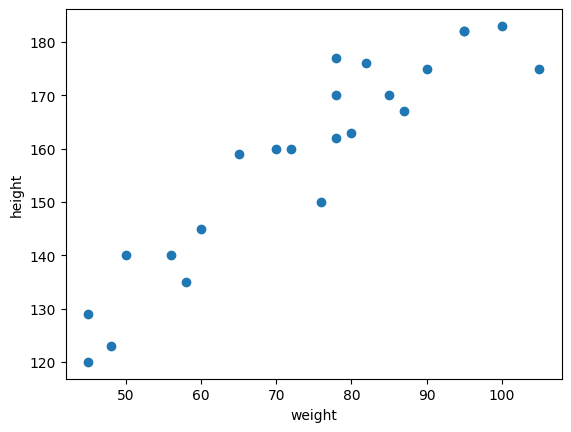

In [5]:
plt.scatter(x=df["Weight"],y=df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [6]:
# corr
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


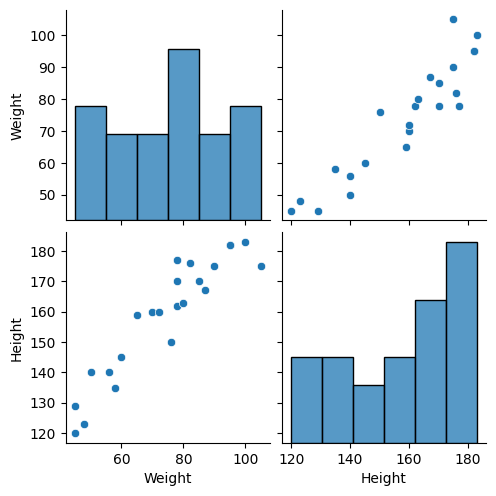

In [7]:
import seaborn as sns 
sns.pairplot(data=df)

In [8]:
# independent and dependent feature
X=df[["Weight"]] # independent feature should be 2 dimensional 

y=df["Height"]


In [9]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [10]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.shape

(17, 1)

In [13]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

In [15]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
## apply linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [17]:
print("Slope",regression.coef_)
print("Intercept",regression.intercept_)

Slope [17.2982057]
Intercept 156.47058823529412


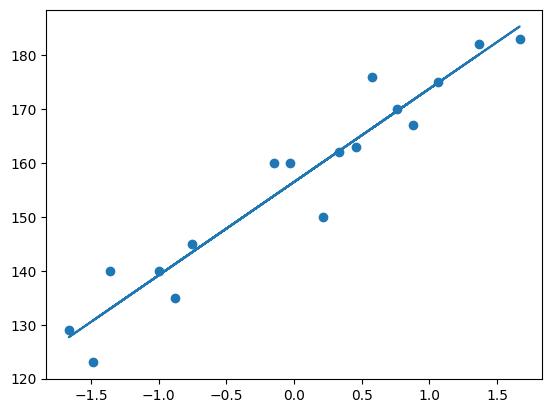

In [18]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [19]:
## prediction 
y_pred=regression.predict(X_test)

In [21]:
y_pred,y_test

(array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
        148.64197186, 190.55897293]),
 15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64)

In [30]:
#y_pred_test=156.470+(X_test)*17.29


from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [34]:
print(f"mean_squared_error: {mse}.  mean_absolute_error:{mae}.   root_mse:{rmse}")

mean_squared_error: 114.84069295228699.  mean_absolute_error:9.66512588679501.   root_mse:10.716374991212605


In [ ]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
print(r2_score)

0.7360826717981276


In [37]:
#ols linear regreesion 
import statsmodels.api as sm 

In [39]:
model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [40]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 29 Jul 2025   Prob (F-statistic):                       0.664
Time:                        09:28:40   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
##. Prediction for new data

regression.predict(scaler.transform([[72]]))

/Users/rahulmanchanda/Desktop/python/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

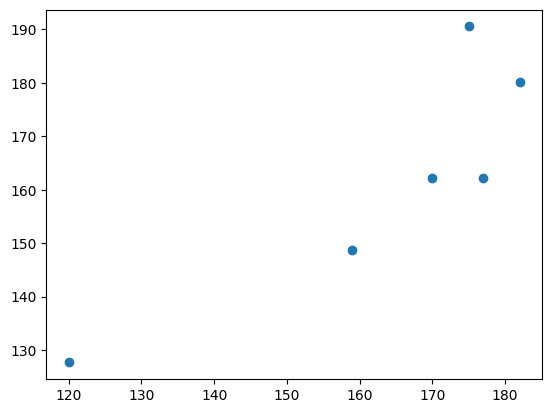

In [22]:
plt.scatter(y_test,y_pred)

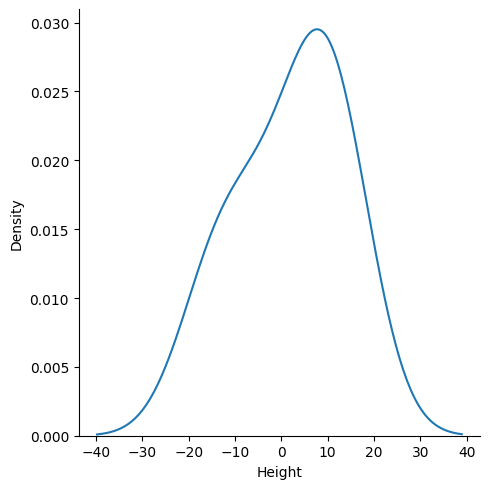

In [25]:
residuals=y_test-y_pred
sns.displot(residuals,kind="kde")